<h1 style='color:blue;'>CHICAGO CRIME DETECTION - EDA<br><span style='color:red;'>Summer Analytics, IIT Guwahati</span></h1>
<h3>You are hired as an Analyst by Chicago Police. They have been maintaining a database of "motor vehicle theft" (sometimes referred to as grand theft auto) since last few years. This is the act of stealing, or attempting to steal, a car.

Due to increasing crimes, they want to make use of data to strategize better to maintain peace and order in their State. As a part of their Analyst team, you have been posed with some questions given below. Use your gained Data Analysis skills to answer these questions and help of the Police Department!

For The Dataset refer to the drive link : https://drive.google.com/drive/folders/1Wy4UppKe_guGnzuC-Xk2zriAECyt0_vt?usp=sharing</h3>

In [2]:
#installing missingno to find out missing values visually
!pip install missingno

In [3]:
#importing libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [4]:
#reading data
df=pd.read_csv('dataset/chicago_crime_dataset.csv',low_memory=False)

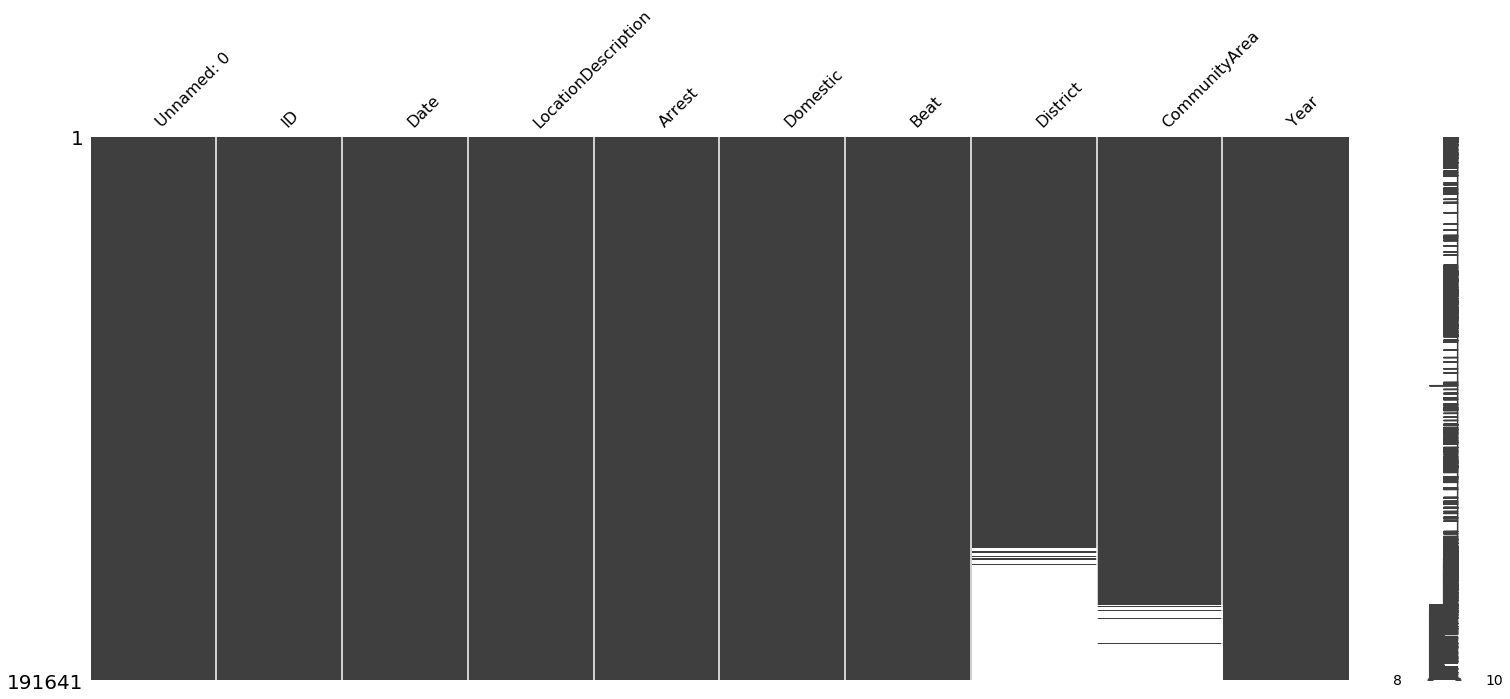

In [5]:
msno.matrix(df)
plt.show()

In [6]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


# Columns Description
<ul>
<li>1. ID : a unique identifier for each observation.</li>
<li>2. Date : the date the crime occurred.</li>
<li>3. LocationDescription : the location where the crime occurred.</li>
<li>4. Arrest : whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).</li>
    <li>5. Domestic : whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).</li>
    <li>6. Beat : the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.</li>
    <li>7. District : the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.</li>
    <li>8. CommunityArea : the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.</li>
    <li>9. Year : the year in which the crime occurred.</li>
    <li>10. Latitude : the latitude of the location at which the crime occurred.</li>
</ul>











In [9]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           191641 non-null  int64 
 1   ID                   191641 non-null  int64 
 2   Date                 191641 non-null  object
 3   LocationDescription  191641 non-null  object
 4   Arrest               191641 non-null  bool  
 5   Domestic             191641 non-null  bool  
 6   Beat                 191641 non-null  int64 
 7   District             148589 non-null  object
 8   CommunityArea        167038 non-null  object
 9   Year                 191641 non-null  int64 
dtypes: bool(2), int64(4), object(4)
memory usage: 12.1+ MB


# Question 1
## What is the Month and Year of the median date in our dataset? *

In [8]:
#sorting Date column in ascending order and resetting index
df.sort_values(by='Date').reset_index()
#Changing date column to datetime type and splitting time
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,2001-01-01,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,2001-01-01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,2001-01-01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,2001-01-01,STREET,False,False,1712,NaN,NaN,2001


In [10]:
x=191641//2
df.iloc[x,2]

datetime.date(2006, 5, 21)

### Answer: May 2006

# Question 2
## In which month did the lowest motor vehicle thefts occur?


In [11]:
#splitting month from date
df['Month'] = pd.to_datetime(df['Date']).dt.month_name(locale = 'English')

In [12]:
#counting value frequencies of months
df['Month'].value_counts()

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Month, dtype: int64

### Answer: February

# Question 3
## On which weekday did most motor vehicle thefts occur?

In [13]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name(locale = 'English') 
df['Day'].value_counts()

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Day, dtype: int64

### Answer: Friday

# Question 4
## Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 

In [14]:
#creating copy of df where arrest=true
arrested=df[df['Arrest']==True]

In [15]:
arrested['Month'].value_counts()

January      1435
December     1397
October      1342
August       1329
July         1324
March        1298
November     1256
April        1252
September    1248
February     1238
June         1230
May          1187
Name: Month, dtype: int64

### Answer: January

# Question 5
## Select the true statements
1. In general, does it look like crime decreases from 2002 - 2012?
2. In general, does it look like crime increases from 2005 - 2008?
3. In general, does it look like crime increases from 2009 - 2011?

In [16]:
#converting years and its crime frequencies to dictionary items
yearly_crimes=df['Year'].value_counts().to_dict()
yearly_crimes

{2001: 20669,
 2002: 18753,
 2004: 16862,
 2003: 16657,
 2005: 16484,
 2006: 16098,
 2011: 15637,
 2010: 15497,
 2008: 14445,
 2007: 14280,
 2012: 14092,
 2009: 12167}

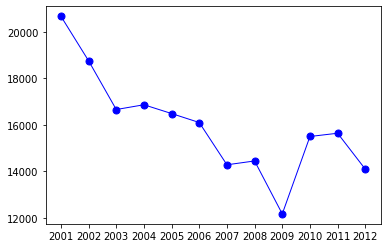

In [17]:
#unpacking into tuples and plotting
lists = sorted(yearly_crimes.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x,y,'bo-', linewidth=1, markersize=7)
plt.xticks(x)
plt.show()

### Answer: Option 1 & 3

# Question 6
## Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?

In [18]:
first_half=arrested[arrested['Year']<2007]
second_half=arrested[arrested['Year']>=2007]
print("Arrests made in First Half: "+str(len(first_half))+"\nArrests made in Second Half: "+str(len(second_half)))

Arrests made in First Half: 10588
Arrests made in Second Half: 4948


### Answer: First Half had more Arrests

# Question 7
## For what proportion of motor vehicle thefts in 2001 was an arrest made? 

In [19]:
thefts_2001 = df[df['Year']==2001]
arrests_2001=thefts_2001['Arrest'].value_counts().tolist()
prop=arrests_2001[1]/arrests_2001[0]
answer = str(round(prop, 2))
answer

'0.12'

### Answer: 0.12

# Question 8
## For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [20]:
thefts_2007 = df[df['Year']==2007]
arrests_2007=thefts_2007['Arrest'].value_counts().tolist()
prop=arrests_2007[1]/arrests_2007[0]
answer = str(round(prop, 2))
answer

'0.09'

### Answer: 0.09

# Question 9
## Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?

In [21]:
top_5_locations=df['LocationDescription'].value_counts().to_dict()

In [22]:
del top_5_locations['OTHER']

In [23]:
flag=0
top5_loc=[]
for i in top_5_locations.items():
    if(flag<5):
        top5_loc.append(i[0])
        flag+=1
    else:
        break
print("Top 5 Locations for motor vehicle thefts are: \n"+str(top5_loc))

Top 5 Locations for motor vehicle thefts are: 
['STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL']


# Question 10
## Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [24]:
Top5=df[df['LocationDescription'].isin(top5_loc)]
print("Top5 dataset contains "+str(len(Top5))+" observations")

Top5 dataset contains 177510 observations


# Question 11
## On which day of the week do the most motor vehicle thefts at gas stations happen?

In [25]:
gas_station=df[df['LocationDescription']=='GAS STATION']
gas_station['Day'].value_counts()

Saturday     338
Sunday       336
Friday       332
Thursday     282
Monday       280
Wednesday    273
Tuesday      270
Name: Day, dtype: int64

### Answer: Saturday